# 1.0 Introduction

**1. Goal:** Predict which team a Irish Football player plays for (classes: Mayo, Galway, Kerry, Dublin)

**2. Success Metric:** Accuracy

**3. Success Metric:** Accuracy: 90%

**4. ML Problem Type** Multiclass Classification (Single Label)

**5. Define Dataset** X_train = (990 Images) (300px, 300px, 3 channels) y_train = (990 Labels) X_test = (176 Images) (300px, 300px, 3 channels) y_test =(176 Labels)

**6. Data Source** Download from Github. Orginally scraped from Google Images.

**7. Model Choices**
Data (990 Images) (300px, 300px, 3 channels)
Model (CNN with MaxPooling Layers) (4 node/dimension output with Softmax Activation Layer)
Loss= Categorical Cross Entropy

# 2.0 Import Libraries

In [153]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

print(tf.__version__)

1.13.1


# 3.0 Download Data & Setup Directory Paths

In [154]:
Path.cwd()

PosixPath('/')

In [155]:
Path.home()

PosixPath('/home/jupyter')

In [156]:
PATH = Path('county-image-classifier')

In [157]:
train_dir = str(Path.home() / 'county-image-classifier' / 'data' / 'raw' / 'train')
validation_dir = str(Path.home() / 'county-image-classifier' / 'data' / 'raw' / 'validation')
test_dir = str(Path.home() / 'county-image-classifier' / 'data' / 'raw' / 'test')


In [158]:
save_model_dir = str(Path.home() / 'county-image-classifier' / 'notebooks')

# 4.0 Build the Network

In [159]:
from keras import layers
from keras import models

In [160]:
model= models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [161]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 33, 33, 128)       147584    
__________

# 4.0 Compile & Run Model

In [162]:
from keras import optimizers

model.compile(
    loss='categorical_crossentropy',
    optimizer= optimizers.RMSprop(lr=0.0001),
    metrics =['acc'])

# 5.0 Data Preprocessing

In [163]:
from keras.preprocessing.image import ImageDataGenerator

#All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [164]:
#Flow training images in batches of 50 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size = 10,
    class_mode='categorical',
    color_mode='rgb',
)

Found 990 images belonging to 4 classes.


In [165]:
#Flow validation images in batches of 10 using validation_datagen generator

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size = 10,
    class_mode='categorical',
    color_mode='rgb',
)

Found 176 images belonging to 4 classes.


# 6.0 Fitting the Model Using Batch Generator

In [166]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=16,
    validation_data=validation_generator,
    validation_steps=20,
    verbose=2
)

Epoch 1/16
 - 47s - loss: 1.2970 - acc: 0.3710 - val_loss: 1.1339 - val_acc: 0.5000
Epoch 2/16
 - 47s - loss: 1.0422 - acc: 0.5450 - val_loss: 0.8609 - val_acc: 0.6837
Epoch 3/16
 - 45s - loss: 0.8745 - acc: 0.6650 - val_loss: 0.7073 - val_acc: 0.7194
Epoch 4/16
 - 47s - loss: 0.7738 - acc: 0.7080 - val_loss: 0.8468 - val_acc: 0.6480
Epoch 5/16
 - 43s - loss: 0.7479 - acc: 0.7270 - val_loss: 0.7158 - val_acc: 0.7449
Epoch 6/16
 - 47s - loss: 0.6939 - acc: 0.7580 - val_loss: 0.5297 - val_acc: 0.8214
Epoch 7/16
 - 48s - loss: 0.6432 - acc: 0.7820 - val_loss: 0.3850 - val_acc: 0.9031
Epoch 8/16
 - 44s - loss: 0.5756 - acc: 0.8070 - val_loss: 0.3732 - val_acc: 0.9082
Epoch 9/16
 - 47s - loss: 0.6149 - acc: 0.8050 - val_loss: 0.3933 - val_acc: 0.8958
Epoch 10/16
 - 44s - loss: 0.5404 - acc: 0.8210 - val_loss: 0.3298 - val_acc: 0.8980
Epoch 11/16
 - 45s - loss: 0.5497 - acc: 0.8230 - val_loss: 0.3693 - val_acc: 0.8827
Epoch 12/16
 - 44s - loss: 0.5461 - acc: 0.8310 - val_loss: 0.3525 - val_a

In [167]:
model.save(save_model_dir + '/county_classifier_6_aug_cap_epoch.h5')

# 7.0 Plot Results

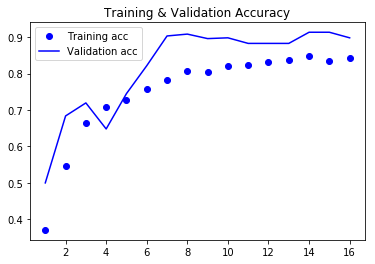

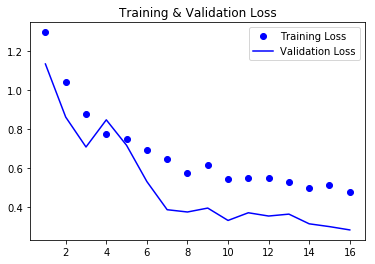

In [168]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.show()

# 7.0 Model Debugging

In [169]:
from sklearn.metrics import classification_report, confusion_matrix

In [170]:
true_classes = validation_generator.classes

In [171]:
class_labels = list(validation_generator.class_indices.keys())  
class_labels

['mayo', 'galway', 'kerry', 'dublin']

In [172]:
#Confution Matrix and Classification Report

#Generates predictions for the input samples from a data generator.

test_steps_per_epoch = np.math.ceil(validation_generator.samples / validation_generator.batch_size)

Y_pred = model.predict_generator(validation_generator, steps=test_steps_per_epoch)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(true_classes, y_pred))


print('Classification Report')
print(classification_report(true_classes, y_pred, target_names=class_labels))

Confusion Matrix
[[15  8 10 15]
 [11 11 14  9]
 [14 12  5 10]
 [11  7 12 12]]
Classification Report
              precision    recall  f1-score   support

        mayo       0.29      0.31      0.30        48
      galway       0.29      0.24      0.27        45
       kerry       0.12      0.12      0.12        41
      dublin       0.26      0.29      0.27        42

   micro avg       0.24      0.24      0.24       176
   macro avg       0.24      0.24      0.24       176
weighted avg       0.24      0.24      0.24       176

